# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2022년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.tmux.conf
./root/.profile
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.bashrc.biolab
./root/.vimrc
--2022-05-11 14:36:24--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  72.16M   100MB/s    in 0.7s    

2022-05-11 14:36:25 (100 MB/s) - ‘miniconda3.sh’ save

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!cp /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work
!ls -al /content/drive/MyDrive/binfo1-work

total 7260240
-rw------- 1 root root 1370036258 May 11 13:39 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May 11 13:39 CLIP-35L33G.bam.bai
-rw------- 1 root root   28109361 May  6 04:25 fivepcounts-filtered-RPF-siLuc.txt
-rw------- 1 root root   45957833 May  6 04:20 fivepcounts-RPF-siLuc.bed
-rw------- 1 root root     855103 May  6 04:18 gencode-exons-containing-startcodon.bed
-rw------- 1 root root  883334756 May 11 13:39 gencode.gtf
-rw------- 1 root root   26842797 May  6 04:17 gencode-plusexon.gtf
-rw------- 1 root root    1063832 May  6 04:16 gencode-start.gtf
drwx------ 2 root root       4096 May  6 04:43 .git
-rw------- 1 root root   23663277 May 11 13:37 read-counts.txt
-rw------- 1 root root        533 May 11 13:37 read-counts.txt.summary
-rw------- 1 root root 1003658801 May 11 13:40 RNA-control.bam
-rw------- 1 root root    2276104 May 11 13:40 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May 11 13:40 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May 11 1

In [ ]:
!md5sum drive/MyDrive/binfo1-work/*

md5sum: 'drive/MyDrive/binfo1-work/*': No such file or directory


In [ ]:
!ls -al drive/MyDrive/binfo*

lrw------- 1 root root    0 May  6 04:04 drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1/binfo1-datapack1

drive/MyDrive/binfo1-work:
total 4527988
-rw------- 1 root root 1370036258 May  6 04:14 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 04:15 CLIP-35L33G.bam.bai
-rw------- 1 root root   28109361 May  6 04:25 fivepcounts-filtered-RPF-siLuc.txt
-rw------- 1 root root   45957833 May  6 04:20 fivepcounts-RPF-siLuc.bed
-rw------- 1 root root     855103 May  6 04:18 gencode-exons-containing-startcodon.bed
-rw------- 1 root root  883334756 May  6 04:15 gencode.gtf
-rw------- 1 root root   26842797 May  6 04:17 gencode-plusexon.gtf
-rw------- 1 root root    1063832 May  6 04:16 gencode-start.gtf
drwx------ 2 root root       4096 May  6 04:43 .git
-rw------- 1 root root 1003658801 May  6 04:15 RNA-control.bam
-rw------- 1 root root    2276104 May  6 04:15 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 04:15 

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y subread

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h7132678_2        22.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.9 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h7132678_2



subread-2.0.1        | 22.9 MB   | : 100% 1.0/1 [00:04<00:00,  4.60s/it]               
Preparing transaction: - 

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로 읽어와 봅니다.

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [ ]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-4.0, 4.0)

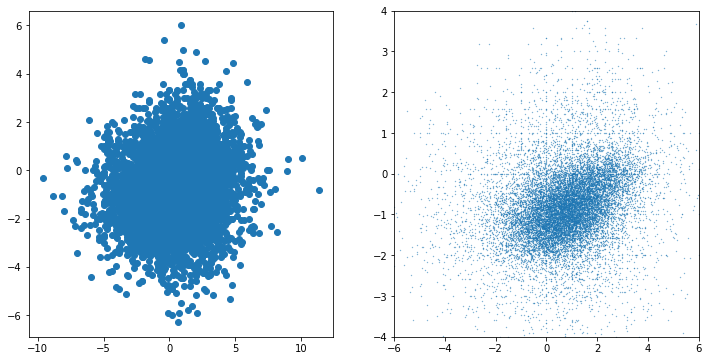

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))
ax[1].scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']), s=0.1, alpha=0.8)
plt.xlim((-6,6))
plt.ylim((-4,4))

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-4.0, 4.0)

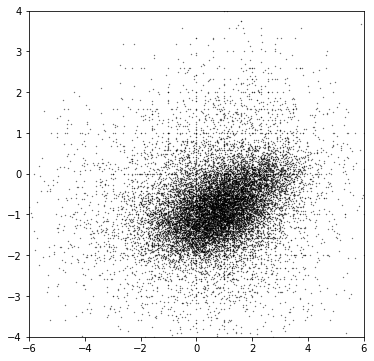

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']), c='black', s=0.1, alpha=0.8)
plt.xlim((-6,6))
plt.ylim((-4,4))

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [ ]:
cnts_modified = cnts.copy()
cnts_modified=cnts_modified.reset_index()
cnts_modified.rename(columns={"Geneid":"gene_id"}, inplace=True)
cnts_modified["gene_id"] = cnts_modified["gene_id"].apply(lambda x : x.split(".")[0])
localized_cnts = pd.merge(cnts_modified, mouselocal)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-4.0, 3.0)

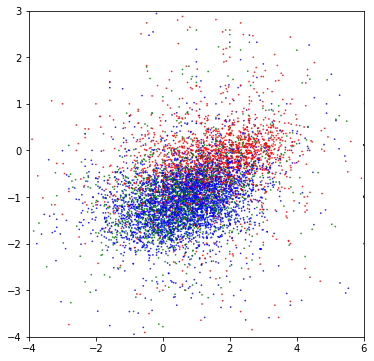

In [ ]:
type_color = {"cytoplasm" : "green", "nucleus" : "blue", "integral membrane" : "red"}
localized_cnts["color"] = localized_cnts["type"].apply(lambda x : type_color[x])
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(np.log2(localized_cnts['clip_enrichment']),
           np.log2(localized_cnts['rden_change']), c=localized_cnts['color'], s=0.5, alpha=0.8)
plt.xlim((-4,6))
plt.ylim((-4,3))

# Git hub push/commit

In [ ]:
!ssh-keygen -t rsa -C "houser178797@gmail.com"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:+qpjAaIjhLiDeTsgcUVg/AB0Y9OkF2BpF4KbvR2DU8I houser178797@gmail.com
The key's randomart image is:
+---[RSA 2048]----+
|o+=@*+.          |
| o*E*+.          |
|o ===.           |
|=+o+oo           |
|+* .+ o S        |
|@ .... .         |
|o= . ..          |
|  o o  .         |
|   o.o...        |
+----[SHA256]-----+


In [ ]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQDOKsWo02/MjtGhCWBg/y6V+ogMyHAOmcK5g0QKbXrEGOwlncVqilEdIia+rUUh4iWmdPLCfz3SQ5xVBtfTBJyoTm47tSLlmGB8DAqBw52tX2ILdlwtaVDMhzkUzoVG+lDCOAu9upYxA1V+tQUNo94CdmAVbVQy2EObbN7H0N6fHKo2x7gEUwYNOUgdk78HY/kDT751zYlyEzH9u3/eEuQ0SUueE899Qhnmgg06aBBnlGNgJiXMMINHOcuey1moG9SemT5ffwmV8YKI4ty4I7ZQibGDSKy0z80eqtdiEBwz4Tpv7n+W86a2PdQZtgFk/YIL91irBJSAJlyuLY/67UVB houser178797@gmail.com


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# github.com:22 SSH-2.0-babeld-472d1285
Hi houser17! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [ ]:
!pwd

/content/drive/MyDrive/binfo1-work


In [ ]:
!git init
!git remote rm origin
!git remote -v

Reinitialized existing Git repository in /content/drive/MyDrive/binfo1-work/.git/


In [ ]:
!git add .

In [ ]:
!git commit -m "complete"

On branch master
nothing to commit, working tree clean


In [ ]:
!git config --global user.email "houser178797@gmail.com"
!git config --global user.name "houser17"

In [ ]:
!git remote add origin git@github.com:houser17/bioinfo_1_prj.git

In [ ]:
!git push -u origin master

Counting objects: 25, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (17/17), done.
remote: fatal: pack exceeds maximum allowed size (2.00 GiB)
fatal: The remote end hung up unexpectedly
fatal: The remote end hung up unexpectedly


In [ ]:
!git log

commit bb4f38abecbaac0aeea5b7a71b358fe21cd99ec6 (HEAD -> master)
Author: houser17 <houser178797@gmail.com>
Date:   Wed May 11 14:29:04 2022 +0000

    complete

commit fac794aa0e4bc5f0af5ac2d707f77f0f61e3669c
Author: HMS <houser178797@gmail.com>
Date:   Fri May 6 05:14:14 2022 +0000

    Basic_setting
